In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('ggplot')
sns.set(rc = {'figure.figsize':(15,8)}, color_codes=True)


In [3]:
ames = pd.read_csv("ames_house_cleaned.csv")
ames.drop(['Unnamed: 0'], axis=1, inplace=True)
ames.head()


,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,SaleType,SaleCondition,NumbrFlrs,HouseAge,Remodeled,LogPrice,AllBathrooms,TotalLivArea,TotalOutdoorSF,HasPool
0,909176150,126000,1-STORY 1945 & OLDER,RL,60,7890,2,0,4,Lvl,...,Warranty Deed,Normal,1,71,1,11.744037,2.0,1094,166,0
1,905476230,139500,1-STORY PUD 1946 & NEWER,RL,42,4235,2,0,4,Lvl,...,Warranty Deed,Normal,1,26,0,11.845820,3.0,1994,105,0
2,911128020,124900,1-STORY 1945 & OLDER,C (all),60,6060,2,0,4,Lvl,...,Warranty Deed,Normal,1,80,1,11.735269,1.0,1738,282,0
3,535377150,114000,2-STORY 1945 & OLDER,RL,80,8146,2,0,4,Lvl,...,Warranty Deed,Normal,2,110,1,11.643954,1.0,1039,279,0
4,534177230,227000,2-STORY 1946 & NEWER,RL,70,8400,2,0,4,Lvl,...,Warranty Deed,Normal,2,9,0,12.332705,3.5,2308,45,0


# What variables are correlated?

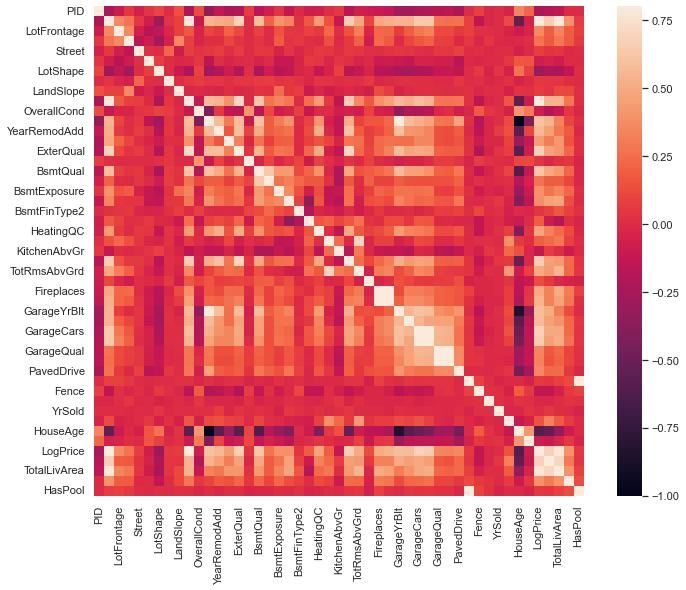

In [4]:
#correlation matrix
corr = ames.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)
plt.savefig('corr_matrix1.png')

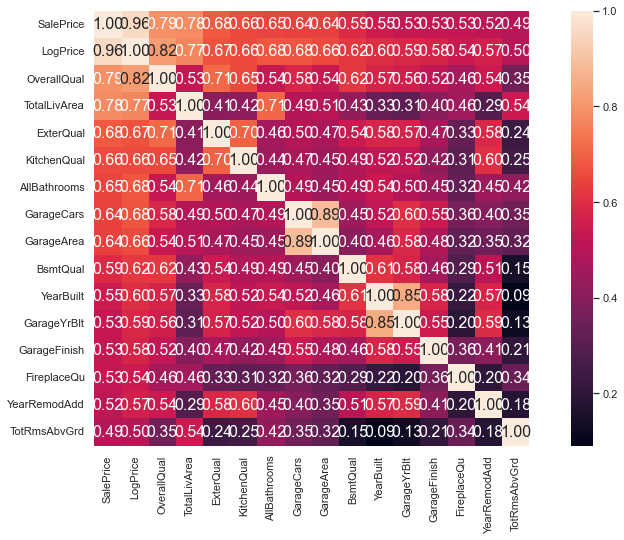

<Figure size 1080x576 with 0 Axes>

In [5]:
#lets look at the strength of the correlation
k = 16 #number of variables
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
corr_m = np.corrcoef(ames[cols].values.T)
sns.set(font_scale=1.0)
sns.heatmap(corr_m, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 16}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('corr_matrix2.png')

In [6]:
#YearBuilt, MoSold, YrSold, GarageYrBlt, YearRemodAdd are all currently integers...
#lets change the data type for later analysis

#YearBuilt
ames.YearBuilt = ames.YearBuilt.astype(str)


#MoSold
ames.MoSold = ames.MoSold.astype(str)


#YrSold
ames.YrSold = ames.YrSold.astype(str)


#GarageYrBlt
ames.GarageYrBlt = ames.GarageYrBlt.astype(str)


#YearRemodAdd
ames.YearRemodAdd = ames.YearRemodAdd.astype(str)


# AMES Housing Stats

In [7]:
#lets look at the stats for numerical data
ames.describe()

,PID,SalePrice,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,...,Fence,MiscVal,NumbrFlrs,HouseAge,Remodeled,LogPrice,AllBathrooms,TotalLivArea,TotalOutdoorSF,HasPool
count,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,...,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,7.138124e+08,178653.399444,68.772258,10099.330684,1.996025,0.088235,3.595787,3.999205,1.052464,6.059618,...,0.599364,49.970986,1.396661,39.453895,0.459459,12.019336,2.206876,1981.560016,183.521065,0.003577
std,1.886539e+08,73983.690129,21.061611,8172.761837,0.062931,0.359153,0.571669,0.028189,0.243463,1.356680,...,1.233747,504.969447,0.489302,29.705644,0.498453,0.378877,0.792628,700.848279,160.379413,0.059714
min,5.263011e+08,35000.000000,21.000000,1300.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,10.463103,1.000000,334.000000,0.000000,0.000000
25%,5.284881e+08,130000.000000,60.000000,7400.000000,2.000000,0.000000,3.000000,4.000000,1.000000,5.000000,...,0.000000,0.000000,1.000000,11.000000,0.000000,11.775290,1.500000,1501.750000,48.000000,0.000000
50%,5.354532e+08,160000.000000,70.000000,9375.000000,2.000000,0.000000,4.000000,4.000000,1.000000,6.000000,...,0.000000,0.000000,1.000000,38.000000,0.000000,11.982929,2.000000,1858.500000,166.500000,0.000000
75%,9.071804e+08,210525.000000,80.000000,11475.000000,2.000000,0.000000,4.000000,4.000000,1.000000,7.000000,...,0.000000,0.000000,2.000000,56.000000,1.000000,12.257359,2.500000,2372.250000,268.000000,0.000000
max,1.007100e+09,625000.000000,313.000000,215245.000000,2.000000,2.000000,4.000000,4.000000,3.000000,10.000000,...,4.000000,15500.000000,2.000000,138.000000,1.000000,13.345507,7.000000,5185.000000,1424.000000,1.000000


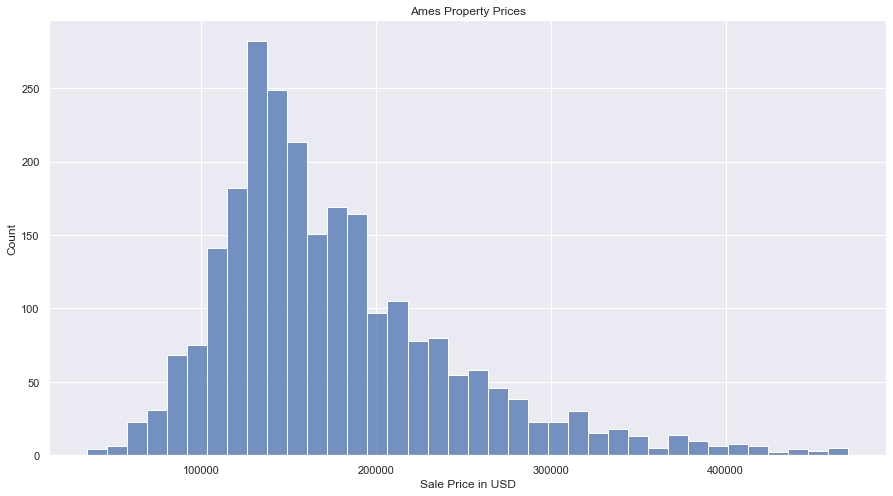

<Figure size 1080x576 with 0 Axes>

In [30]:
#Check skewness
#histogram
sns.histplot(ames.SalePrice)
plt.title("Ames Property Prices")
plt.xlabel("Sale Price in USD")
plt.ylabel("Count")
plt.show()
plt.savefig('price_skew.png')


Skewness: 1.657403


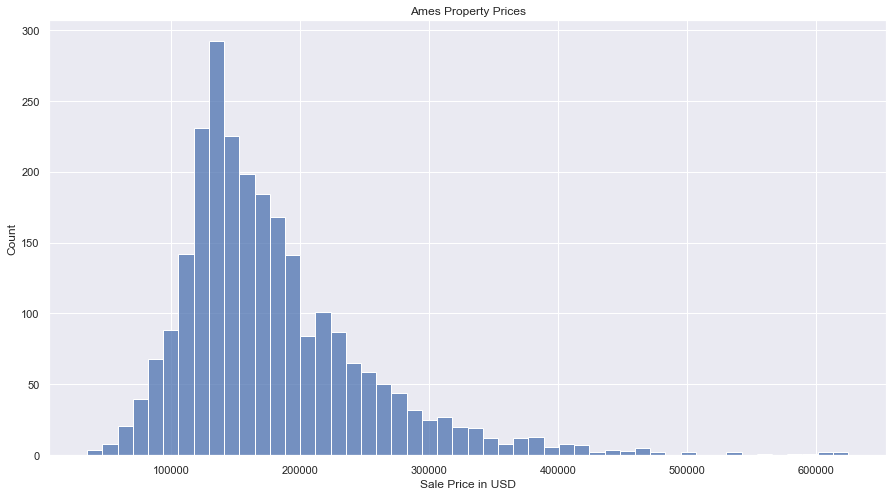

<Figure size 1080x576 with 0 Axes>

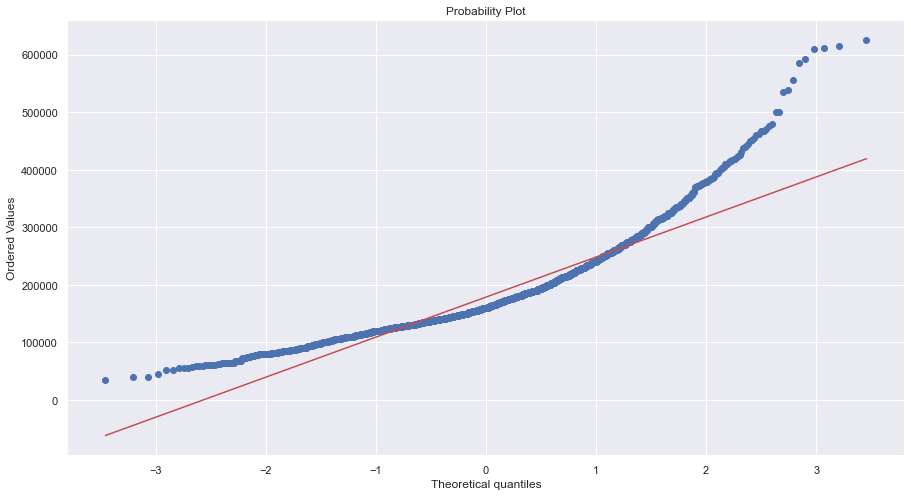

In [10]:
#lets check the skewness
print("Skewness: %f" % ames.SalePrice.skew())
#highly skewed

#histogram
sns.histplot(ames.SalePrice)
plt.title("Ames Property Prices")
plt.xlabel("Sale Price in USD")
plt.ylabel("Count")
plt.show()
plt.savefig('price_skew.png')

#normal probability plot
fig = plt.figure()
res = stats.probplot(ames['SalePrice'], plot=plt)
plt.savefig('price_skew1.png')

Skewness: 0.187812


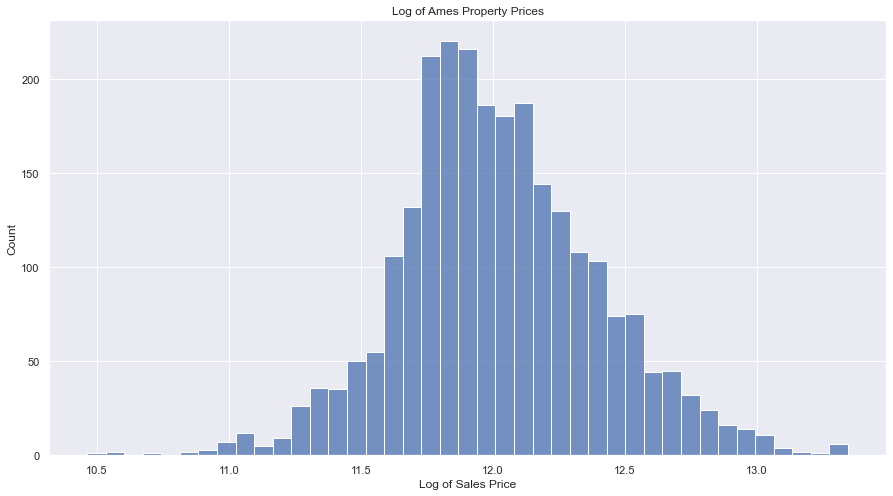

<Figure size 1080x576 with 0 Axes>

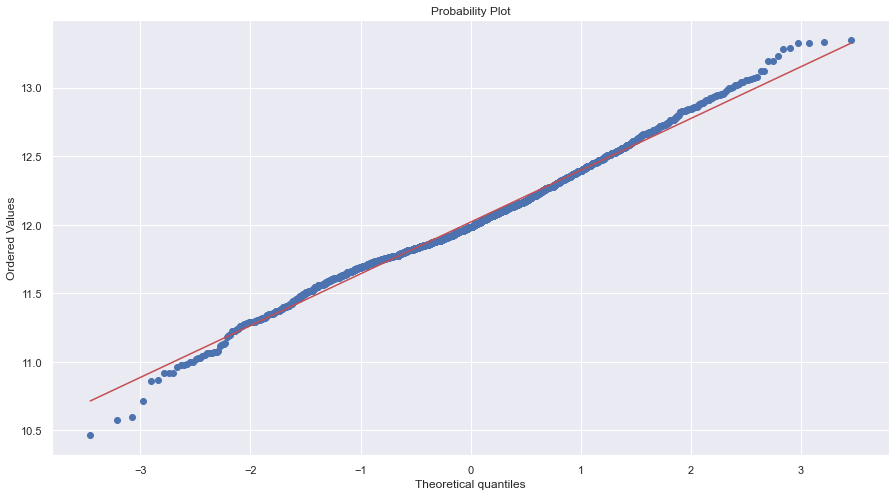

In [11]:
#how does the log compare?

#lets check the skewness
print("Skewness: %f" % ames.LogPrice.skew())
#significantly less skewness

#histogram
sns.histplot(ames.LogPrice)
plt.title("Log of Ames Property Prices")
plt.xlabel("Log of Sales Price")
plt.ylabel("Count")
plt.show()
plt.savefig('price_skew2.png')

#normal probability plot
fig = plt.figure()
res = stats.probplot(ames['LogPrice'], plot=plt)
plt.savefig('price_skew3.png')

# Are there any outliers present?

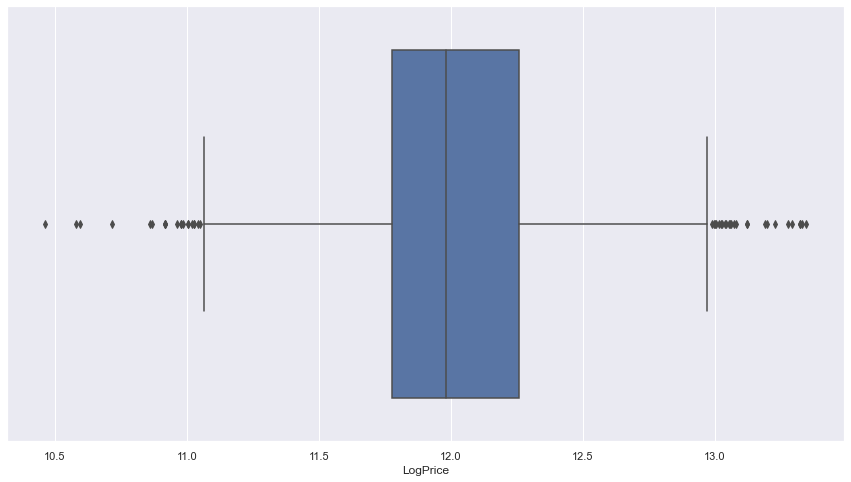

In [9]:
#saleprice outliers
sns.boxplot(x = ames.LogPrice, )
plt.show()

Skewness: 0.901536


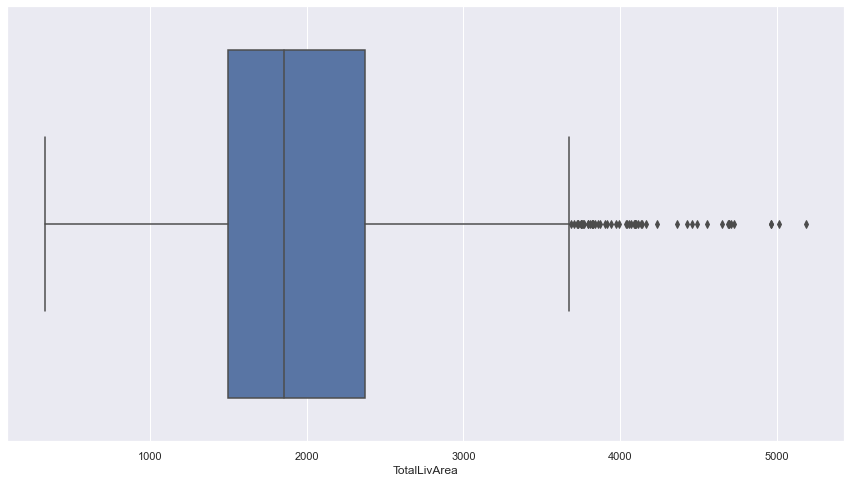

<Figure size 1080x576 with 0 Axes>

In [12]:
print("Skewness: %f" % ames.TotalLivArea.skew())
#moderately skewed

#GrLivArea outliers
sns.boxplot(x = ames.TotalLivArea)
plt.show()
plt.savefig('size_outlier.png')

Skewness: 13.162831


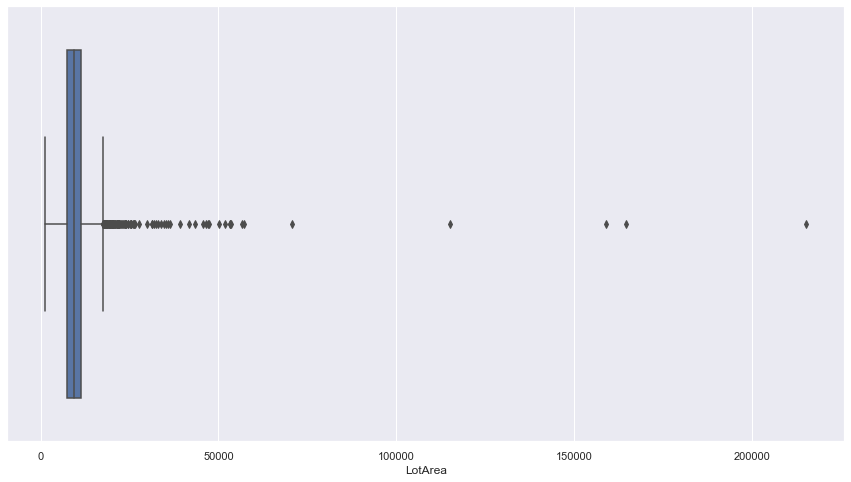

In [12]:
print("Skewness: %f" % ames.LotArea.skew())
#highly skewed

#LotArea outliers
sns.boxplot(x = ames.LotArea)
plt.show()

In [13]:
ames.shape

(2516, 72)

In [13]:
"""
function that takes a dataframe, column, and number of 
standard deviations as inputs and returns each row that is
considered an outlier according to the standard dev. input.
"""

def show_outliers(df,columns,num_sd):
    for col in columns:
        print('Working on column: {}'.format(col))
        outliers = (df[np.abs(stats.zscore(df[col])) > num_sd]).sort_values(col)
    return outliers


ames_copy = ames


"""
function that takes a dataframe, column, and number of 
standard deviations as inputs and returns a dataframe
without the outliers present according to the standard dev.
"""

def drop_outliers(df,columns,num_sd):
    for col in columns:
        print('Working on column: {}'.format(col))
        new_df = df[np.abs(stats.zscore(df[col])) < num_sd]
    return new_df


so as not to skew my predictions, I have decided to remove outliers that are more than 3 SDs from the mean
helpful resource: https://stephenallwright.com/remove-outliers-pandas/
& also: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [15]:
#lets look at how many price outliers there are
price_outliers = show_outliers(ames_copy, ['SalePrice'], 4)
price_outliers

Working on column: SalePrice


,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,SaleType,SaleCondition,NumbrFlrs,HouseAge,Remodeled,LogPrice,AllBathrooms,TotalLivArea,TotalOutdoorSF,HasPool
1940,902400110,475000,2-1/2 STORY ALL AGES,RM,90,22950,2,0,2,Lvl,...,Warranty Deed,Normal,2,118,1,13.071070,2.5,3608,670,0
273,528110040,479069,1-STORY 1946 & NEWER ALL STYLES,RL,107,13891,2,0,4,Lvl,...,New,Partial,1,3,0,13.079600,3.0,4364,158,0
205,528176010,500000,1-STORY 1946 & NEWER ALL STYLES,RL,110,14300,2,0,4,HLS,...,Warranty Deed,Normal,1,7,1,13.122363,3.5,4069,370,0
106,528118050,500067,1-STORY 1946 & NEWER ALL STYLES,RL,59,17169,2,0,2,Lvl,...,New,Partial,1,3,0,13.122497,4.5,3974,222,0
383,527214060,535000,2-STORY 1946 & NEWER,RL,82,16052,2,0,3,Lvl,...,New,Partial,2,4,0,13.190022,3.5,3904,250,0
749,527216070,538000,2-STORY 1946 & NEWER,RL,47,53504,2,0,2,HLS,...,Warranty Deed,Normal,2,7,0,13.195614,4.5,4695,749,0
1049,528106020,555000,1-STORY 1946 & NEWER ALL STYLES,RL,105,15431,2,0,4,Lvl,...,Warranty Deed,Normal,1,2,0,13.226723,3.0,4708,242,0
2024,528360050,584500,2-STORY 1946 & NEWER,RL,114,17242,2,0,3,Lvl,...,Warranty Deed,Normal,2,17,1,13.278512,4.5,5185,1166,0
573,527216080,591587,1-STORY 1946 & NEWER ALL STYLES,RL,52,51974,2,0,3,Lvl,...,New,Partial,1,4,1,13.290564,3.5,3439,457,0
1576,528110020,610000,1-STORY 1946 & NEWER ALL STYLES,RL,105,13693,2,0,4,Lvl,...,Warranty Deed,Normal,1,3,0,13.321214,4.5,4962,410,0


looks like SalePrice outliers are over $500,000

In [16]:
#dropping outliers over 4 SD away from mean
ames_copy = drop_outliers(ames_copy,['SalePrice'],4)
ames_copy.shape

Working on column: SalePrice


(2503, 72)

In [17]:
#lets look at how many GrLivArea outliers there are
ttlliv_outliers = show_outliers(ames_copy, ['TotalLivArea'], 4)
ttlliv_outliers

Working on column: TotalLivArea


,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,SaleType,SaleCondition,NumbrFlrs,HouseAge,Remodeled,LogPrice,AllBathrooms,TotalLivArea,TotalOutdoorSF,HasPool
229,528110110,417500,1-STORY 1946 & NEWER ALL STYLES,RL,105,13693,2,0,4,Lvl,...,Warranty Deed,Normal,1,3,0,12.942040,3.5,4687,436,0
540,906402200,320000,2-STORY 1946 & NEWER,RL,90,12376,2,0,4,Lvl,...,Warranty Deed,Normal,2,20,0,12.676076,4.0,4692,367,0
1923,533350020,373000,1-STORY 1946 & NEWER ALL STYLES,RL,94,17778,2,0,3,Lvl,...,Warranty Deed,Normal,1,29,0,12.829334,3.0,4958,266,0


looks like TotalLivArea outliers are around 5000 SF

In [18]:
#dropping outliers over 4 SD away from mean
ames_copy = drop_outliers(ames_copy,['TotalLivArea'],4)
ames_copy.shape

Working on column: TotalLivArea


(2500, 72)

In [19]:
ames = ames_copy
new_line = '\n'
price = ames['SalePrice']
print(f'Most Common Price: {new_line}{price.mode()}')
print(new_line)

size_related = ames.filter(regex='SF$|Area$')
print(f'Size Summary: {new_line}{size_related.describe()}')
print(new_line)
print(f'Size Modes: {new_line}{size_related.mode(axis=0, numeric_only=True, dropna=True)}')


Most Common Price: 
0    135000
dtype: int64


Size Summary: 
            LotArea   MasVnrArea    BsmtUnfSF   GarageArea  TotalLivArea  \
count    2500.00000  2500.000000  2500.000000  2500.000000   2500.000000   
mean    10027.38560    95.337600   540.453600   465.748800   1965.626800   
std      8081.50071   168.095477   426.096145   204.296024    672.868952   
min      1300.00000     0.000000     0.000000     0.000000    334.000000   
25%      7389.50000     0.000000   215.000000   319.750000   1498.250000   
50%      9360.00000     0.000000   449.000000   474.000000   1855.000000   
75%     11422.25000   150.000000   784.000000   576.000000   2352.000000   
max    215245.00000  1600.000000  2336.000000  1488.000000   4648.000000   

       TotalOutdoorSF  
count     2500.000000  
mean       182.014800  
std        158.456739  
min          0.000000  
25%         48.000000  
50%        166.000000  
75%        266.000000  
max       1424.000000  


Size Modes: 
   LotArea  MasVnrArea

In [20]:
print("YearBuilt Value Counts: \n",ames["YearBuilt"].value_counts())
print("\n")
print("YearRemodAdd Value Counts: \n",ames["YearRemodAdd"].value_counts())
print("\n")
print("YrSold Value Counts: \n",ames["YrSold"].value_counts())
print("\n")
print("MoSold Value Counts: \n",ames["MoSold"].value_counts())
print("\n")
#Most frequent year built:2005
#Most frequent remodel year: 1950
#Most frequent year sold: 2007
#Most frequent month sold: 6 (June)

YearBuilt Value Counts: 
 2005    107
2004     96
2003     83
2006     77
2007     58
       ... 
1906      1
1898      1
1892      1
1872      1
1879      1
Name: YearBuilt, Length: 114, dtype: int64


YearRemodAdd Value Counts: 
 1950    299
2005    134
2006    133
2004    104
2000     96
       ... 
1951     11
1952     11
1983     11
1982      8
2010      5
Name: YearRemodAdd, Length: 61, dtype: int64


YrSold Value Counts: 
 2007    586
2009    573
2008    547
2006    492
2010    302
Name: YrSold, dtype: int64


MoSold Value Counts: 
 Jun    449
Jul    393
May    357
Apr    244
Mar    201
Aug    188
Oct    139
Sep    125
Feb    115
Nov    112
Jan     95
Dec     82
Name: MoSold, dtype: int64




categorical value counts

In [24]:
print("MSSubClass Value Counts: \n",ames["MSSubClass"].value_counts())
print("\n")
print("MSZoning Value Counts: \n",ames["MSZoning"].value_counts())
print("\n")
print("Neighborhood Value Counts: \n",ames["Neighborhood"].value_counts())
print("\n")
print("OverallQual Value Counts: \n",ames["OverallQual"].value_counts())
print("\n")
print("OverallCond Value Counts: \n",ames["OverallCond"].value_counts())

MSSubClass Value Counts: 
 1-STORY 1946 & NEWER ALL STYLES              906
2-STORY 1946 & NEWER                         488
1-1/2 STORY FINISHED ALL AGES                250
1-STORY PUD 1946 & NEWER                     168
1-STORY 1945 & OLDER                         117
2-STORY PUD 1946 & NEWER                     117
2-STORY 1945 & OLDER                         113
SPLIT OR MULTI-LEVEL                         106
DUPLEX ALL STYLES AND AGES                    83
2 FAMILY CONVERSION - ALL STYLES AND AGES     50
SPLIT FOYER                                   43
2-1/2 STORY ALL AGES                          20
1-1/2 STORY - UNFINISHED ALL AGES             17
PUD MULTILEVEL - INCL SPLIT LEV/FOYER         15
1-STORY W/ FINISHED ATTIC ALL AGES             6
1-1/2 STORY PUD ALL AGES                       1
Name: MSSubClass, dtype: int64


MSZoning Value Counts: 
 RL         1952
RM          401
FV          111
RH           20
C (all)      13
I (all)       2
A (agr)       1
Name: MSZoning, dty

/var/folders/y9/fzcglvx51gb_4cpw72hcn17m0000gp/T/ipykernel_80099/2198050382.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

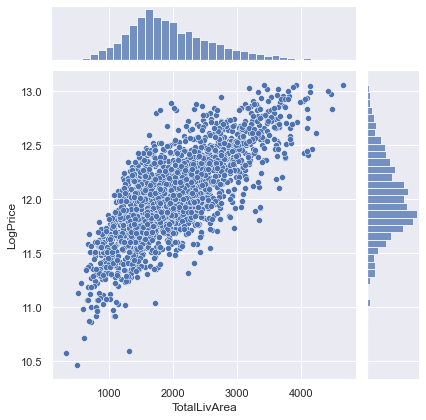

<Figure size 720x720 with 0 Axes>

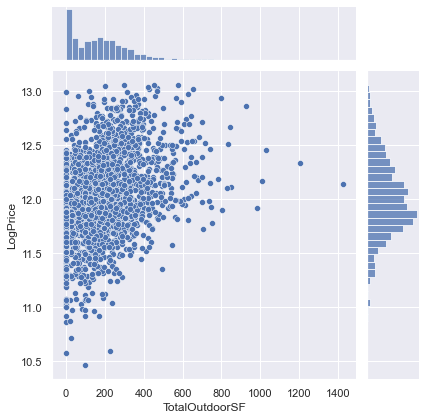

<Figure size 720x720 with 0 Axes>

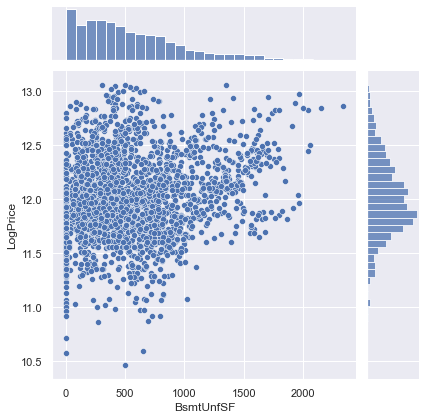

<Figure size 720x720 with 0 Axes>

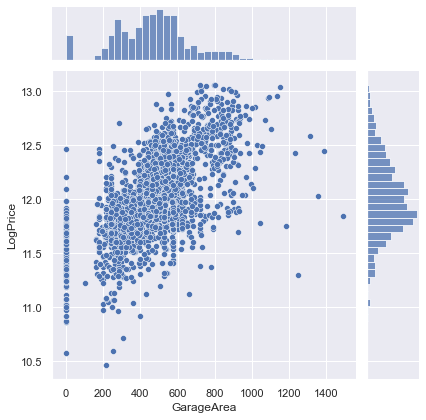

<Figure size 720x720 with 0 Axes>

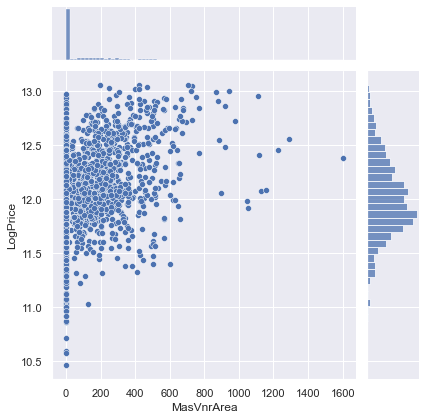

<Figure size 720x720 with 0 Axes>

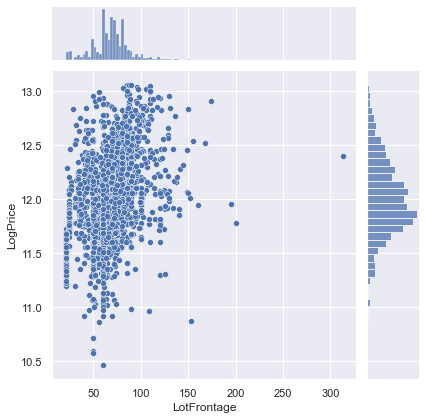

<Figure size 720x720 with 0 Axes>

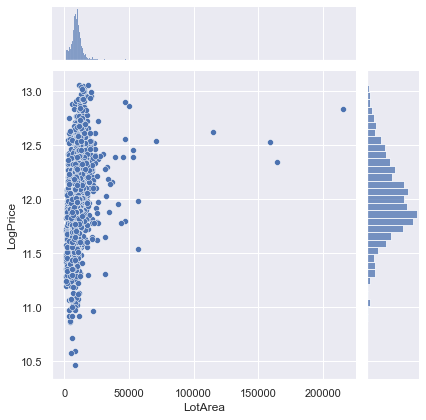

<Figure size 720x720 with 0 Axes>

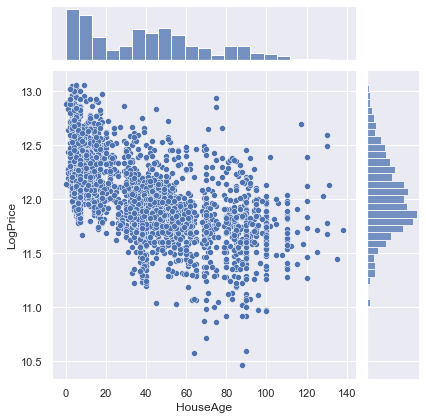

<Figure size 720x720 with 0 Axes>

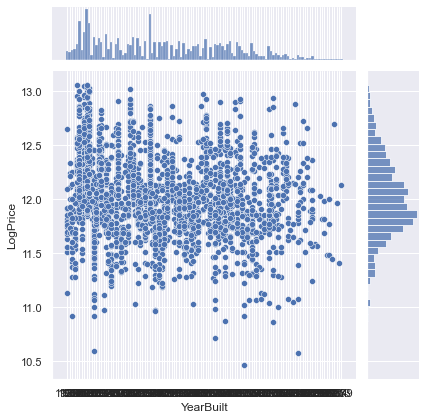

<Figure size 720x720 with 0 Axes>

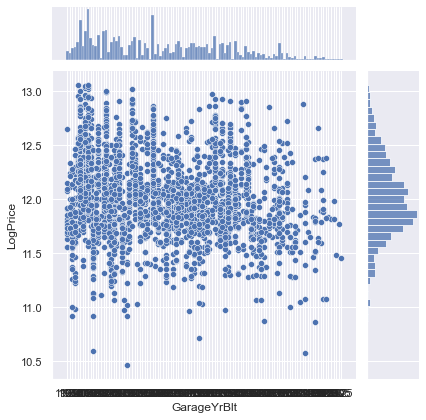

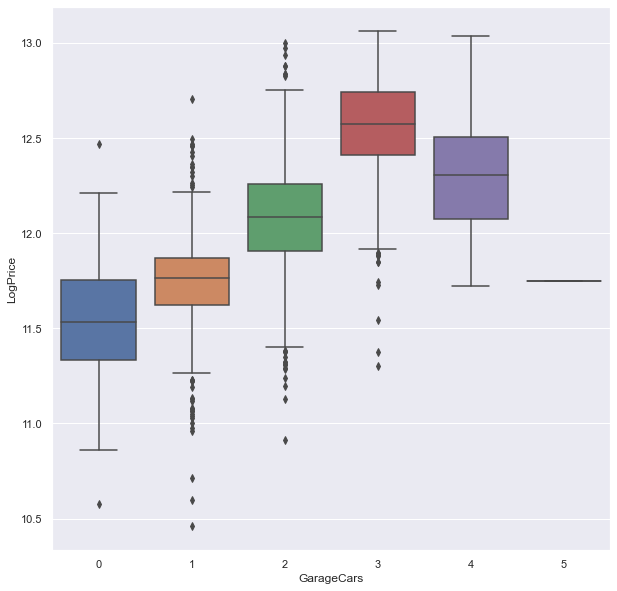

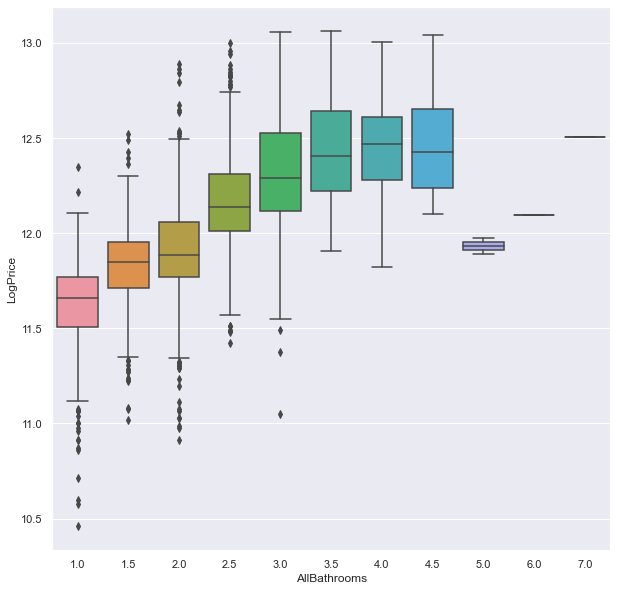

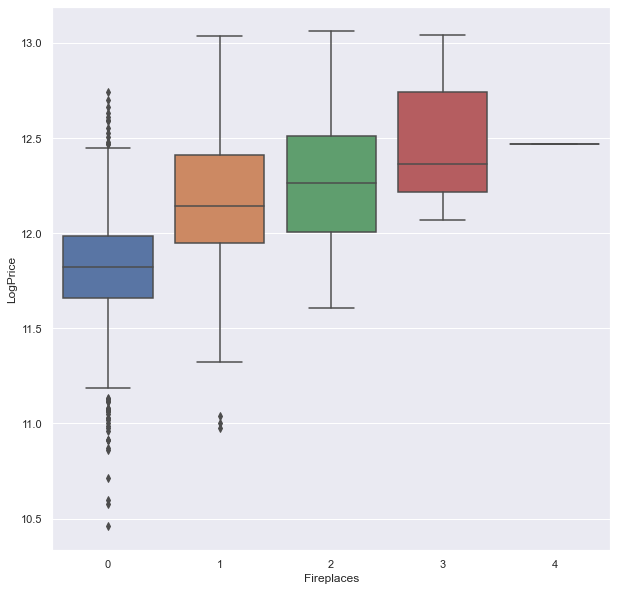

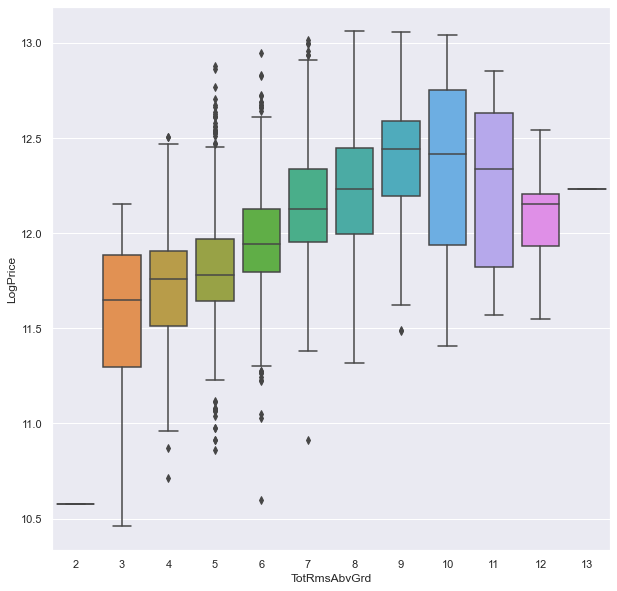

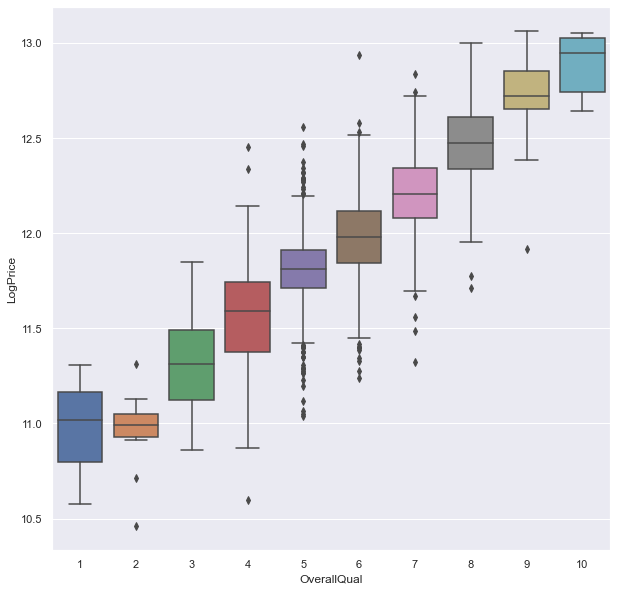

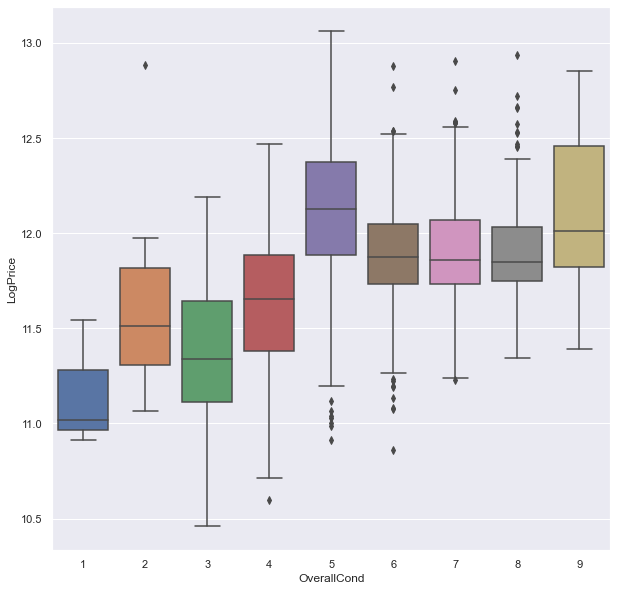

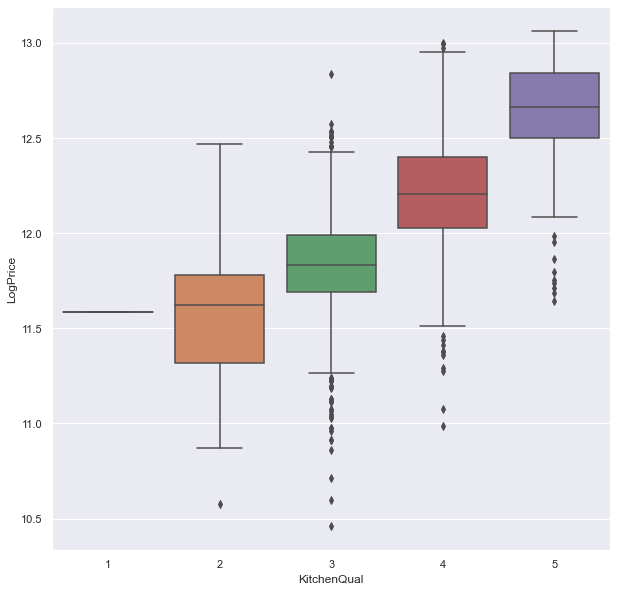

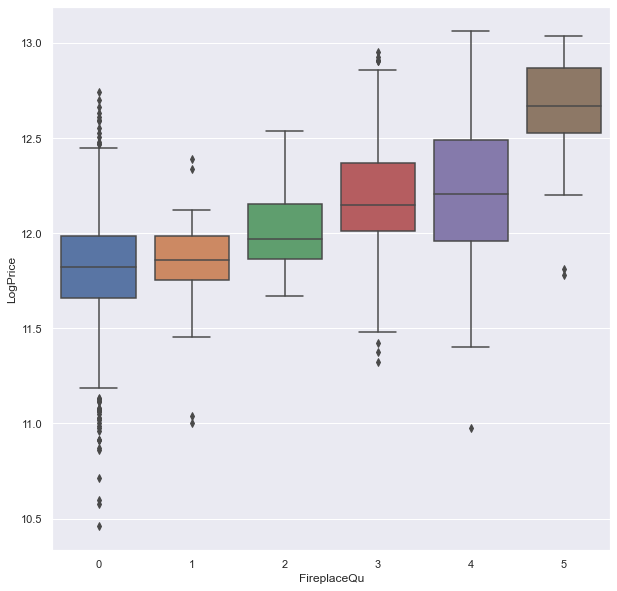

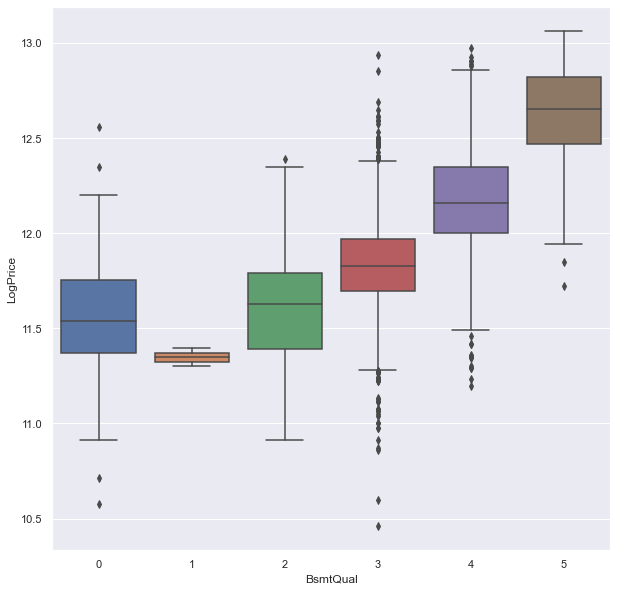

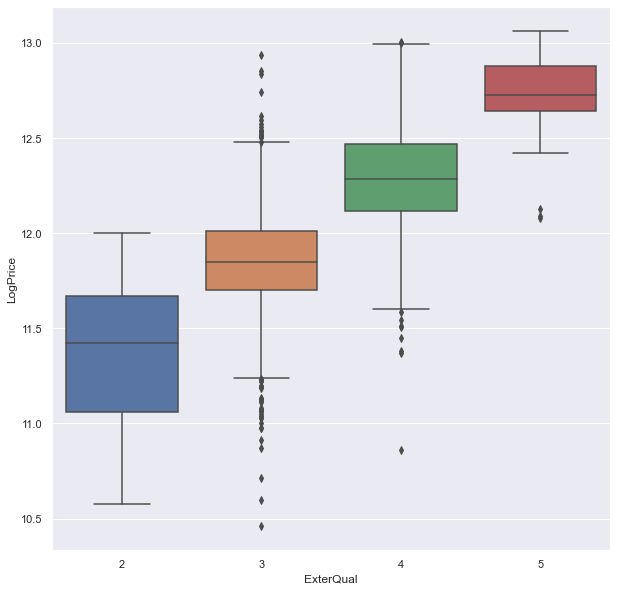

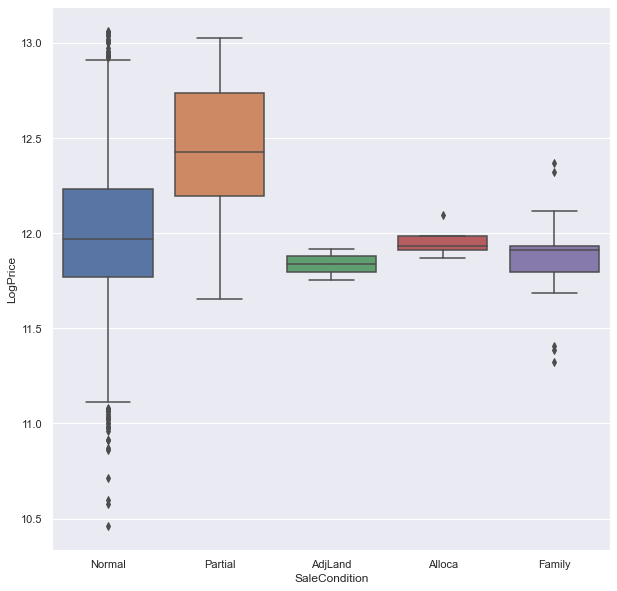

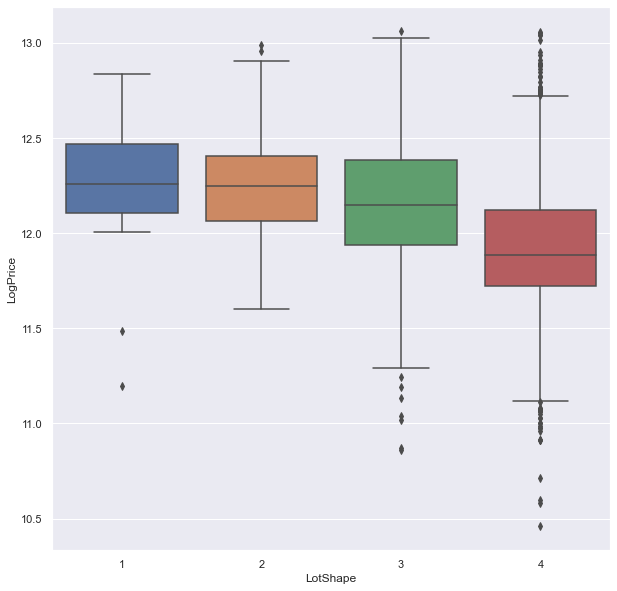

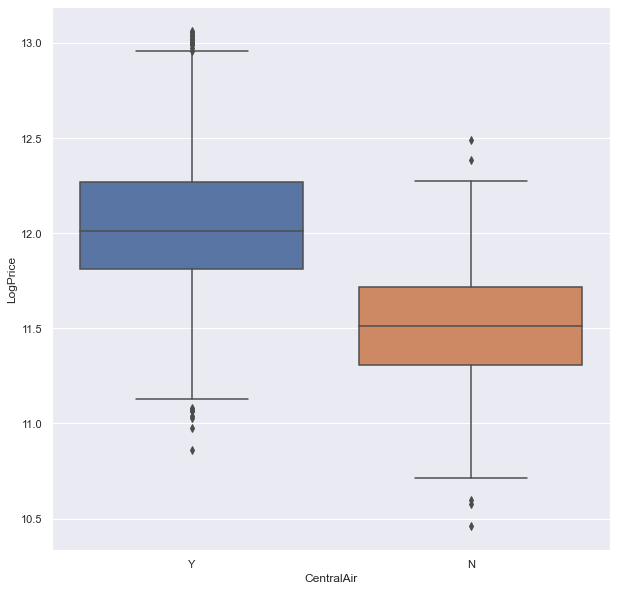

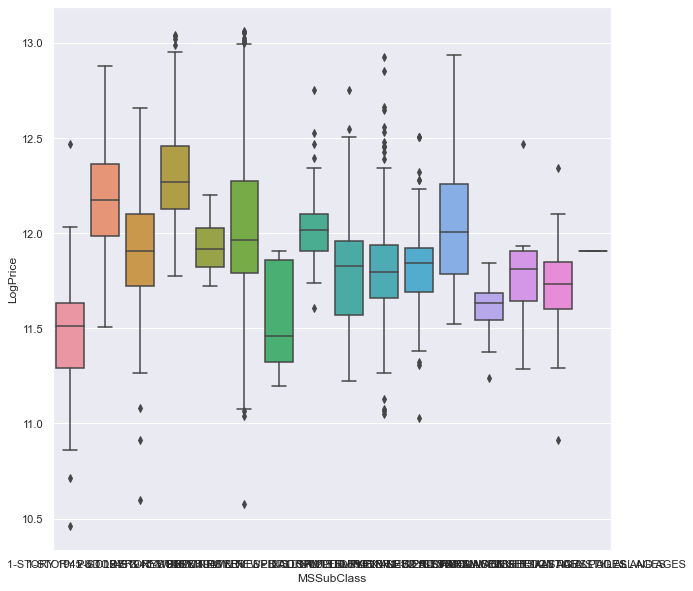

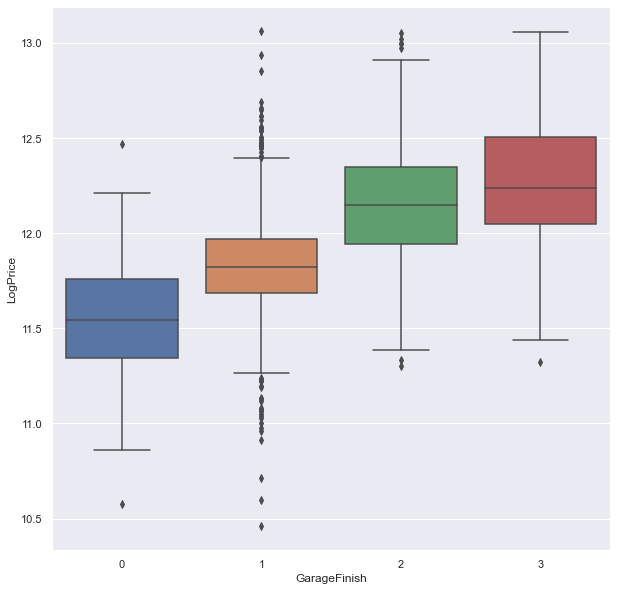

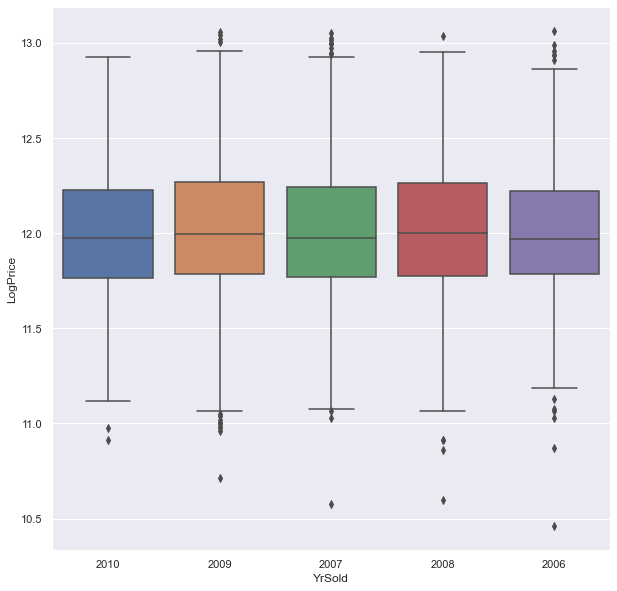

In [35]:
#lets look at the features with the strongest correlation to SalePrice in more detail

# ames[['TotalLivArea', 'SalePrice']].plot(kind='scatter', x='TotalLivArea', y='SalePrice', logx=True, logy=True)

y = ames.LogPrice


feat_lst1 = [
    "TotalLivArea","TotalOutdoorSF","BsmtUnfSF",
    "GarageArea","MasVnrArea","LotFrontage","LotArea",
    "HouseAge","YearBuilt","GarageYrBlt",
]


feat_lst2 = [
    "GarageCars","AllBathrooms","Fireplaces",
    "TotRmsAbvGrd","OverallQual","OverallCond",
    "KitchenQual","FireplaceQu","BsmtQual",
    "ExterQual","SaleCondition",
    "LotShape","CentralAir","MSSubClass",
    "GarageFinish","YrSold",
]

#first the SF features
for feature in feat_lst1:
    plt.figure(figsize=(10, 10))
    x = ames[feature]
    sns.jointplot(x=x, y=y, data=ames)
    
#other features    
for feature in feat_lst2:
    plt.figure(figsize=(10, 10))
    x = ames[feature]
    sns.boxplot(x=x, y=y, data=ames)
    
    

In [ ]:
# as expected, the size of the listing does appear to impact the price

# it appears the number garage cars adds value to listings, but this dips after 3 cars

# there is a similar trend with garage area

# basement SF does add value to the listing, but there are outliers

as expected, the higher the quality of home, the higher the price

In [ ]:
#histogram and normal probability plot
sns.histplot(ames[ames['TotalBsmtSF']>0]['TotalBsmtSF']);
plt.figure()
#normal probability plot
stats.probplot(ames[ames['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)
plt.figure()


#histogram and normal probability plot
sns.histplot(ames[ames['GarageArea']>0]['GarageArea']);
plt.figure()
#normal probability plot
stats.probplot(ames[ames['GarageArea']>0]['GarageArea'], plot=plt)
plt.figure()

#histogram and normal probability plot
sns.histplot(ames[ames['MasVnrArea']>0]['MasVnrArea']);
plt.figure()
#normal probability plot
stats.probplot(ames[ames['MasVnrArea']>0]['MasVnrArea'], plot=plt)
plt.figure()


#histogram and normal probability plot
sns.histplot(ames[ames['BsmtFinSF1']>0]['BsmtFinSF1']);
plt.figure()
#normal probability plot
stats.probplot(ames[ames['BsmtFinSF1']>0]['BsmtFinSF1'], plot=plt)
plt.figure()


In [ ]:
#log of selected features

In [ ]:


#scatter plot of log grlivarea/saleprice
ames[['GrLivArea', 'SalePrice']].plot(
    kind='scatter', x='GrLivArea', y='SalePrice', color='blue', logx=True, logy=True
    )
plt.title("Log of Living Area to Price in Ames, IA")
plt.show()


#scatter plot of log totalbsmtsf/saleprice
ames[['TotalBsmtSF', 'SalePrice']].plot(
    kind='scatter', x='TotalBsmtSF', y='SalePrice', color='blue', logx=True, logy=True
    )
plt.title("Log of Basement Area to Price in Ames, IA")
plt.show()


#scatter plot of log 1stflrsf/saleprice
ames[["1stFlrSF", "SalePrice"]].plot(
    kind='scatter', x="1stFlrSF", y='SalePrice', color='blue', logx=True, logy=True
    )
plt.title("Log of First Floor Area to Price in Ames, IA")
plt.show()


#scatter plot of log garagearea/saleprice
ames[['GarageArea', 'SalePrice']].plot(
    kind='scatter', x='GarageArea', y='SalePrice', color='blue', logx=True, logy=True
    )
plt.title("Log of Garage Area to Price in Ames, IA")
plt.show()


#scatter plot of log masvnrarea/saleprice
ames[['MasVnrArea', 'SalePrice']].plot(
    kind='scatter', x='MasVnrArea', y='SalePrice', color='blue', logx=True, logy=True
    )
plt.title("Log of Masonry Veneer Area to Price in Ames, IA")
plt.show()


#scatter plot of log BsmtFinSF1/saleprice
ames[['BsmtFinSF1', 'SalePrice']].plot(
    kind='scatter', x='BsmtFinSF1', y='SalePrice', color='blue', logx=True, logy=True
    )
plt.title("Log of Finished Basement Area to Price in Ames, IA")
plt.show()


#scatter plot of log lotarea/saleprice
ames[['LotArea', 'SalePrice']].plot(
    kind='scatter', x='LotArea', y='SalePrice', color='blue', logx=True, logy=True
    )
plt.title("Log of Lot Area to Price in Ames, IA")
plt.show()


partial means that the home was not completed when last assessed. The higher price makes sense because this is associated with new homes

# Most Common Listing Types?

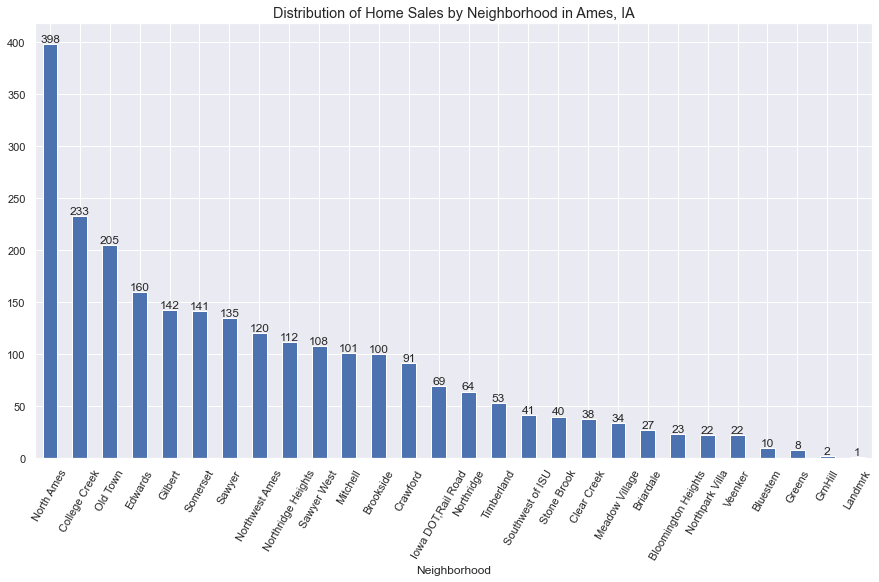

<Figure size 1080x576 with 0 Axes>

In [21]:
#what are the most popular neighborhoods?

neighborhood_plt = ames.groupby('Neighborhood')['Neighborhood'].count().sort_values(
    ascending=False).tail(30).plot.bar(rot=60)
plt.title('Distribution of Home Sales by Neighborhood in Ames, IA',size='large')
for container in neighborhood_plt.containers:
    neighborhood_plt.bar_label(container)
    
plt.show()
plt.savefig('nhood_dist.png')

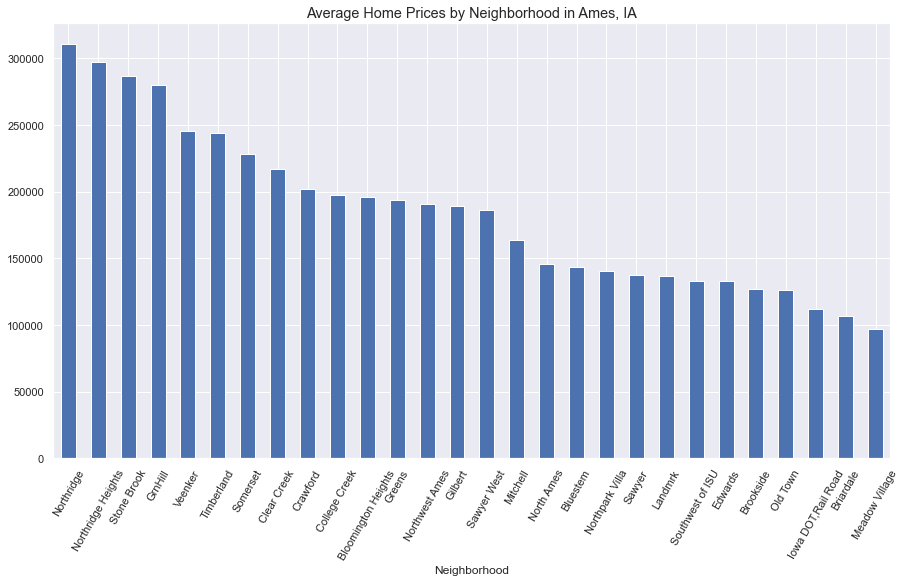

In [24]:
#avg price per neighborhood
neighborhood_plt = ames.groupby('Neighborhood')['SalePrice'].mean().sort_values(
    ascending=False).tail(30).plot.bar(rot=60)
plt.title('Average Home Prices by Neighborhood in Ames, IA',size='large')
plt.savefig('avg_price_nhood.png')
# for container in neighborhood_plt.containers:
#     neighborhood_plt.bar_label(container)

In [25]:
#over 25% of home sales are located in NAmes and CollgCr
pd.concat([ames.Neighborhood.value_counts(),
           ((ames.Neighborhood.value_counts()/len(ames))*100).rename("Percent")], axis=1)

,Neighborhood,Percent
North Ames,398,15.92
College Creek,233,9.32
Old Town,205,8.20
Edwards,160,6.40
Gilbert,142,5.68
Somerset,141,5.64
Sawyer,135,5.40
Northwest Ames,120,4.80
Northridge Heights,112,4.48
Sawyer West,108,4.32


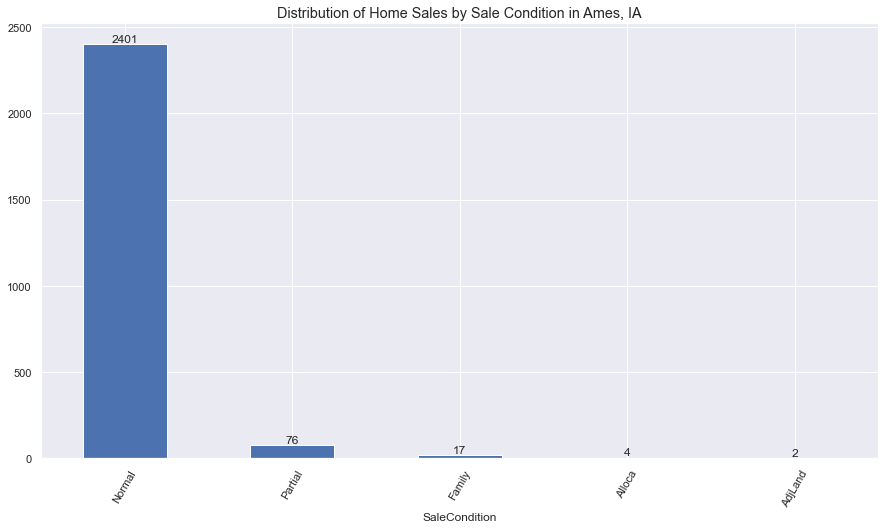

In [26]:
#what are the most common Sale Conditions?

condition_plt = ames.groupby('SaleCondition')['SaleCondition'].count().sort_values(
    ascending=False).tail(15).plot.bar(rot=60)
plt.title('Distribution of Home Sales by Sale Condition in Ames, IA',size='large')
for container in condition_plt.containers:
    condition_plt.bar_label(container)
    
plt.show()

the majority of homes sold are in normal condition

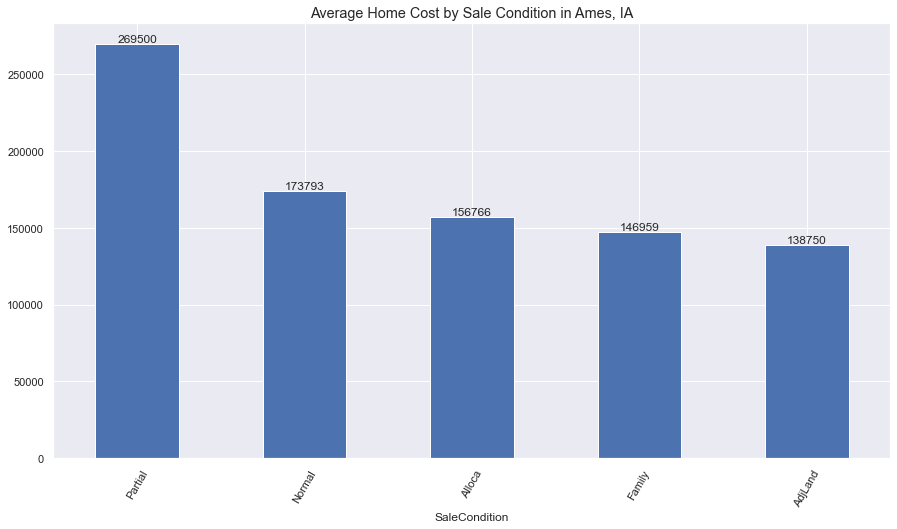

In [29]:
condition_plt = ames.groupby('SaleCondition')['SalePrice'].mean().sort_values(
    ascending=False).tail(15).plot.bar(rot=60)
plt.title('Average Home Cost by Sale Condition in Ames, IA',size='large')
for container in condition_plt.containers:
    condition_plt.bar_label(container)
    
plt.show()

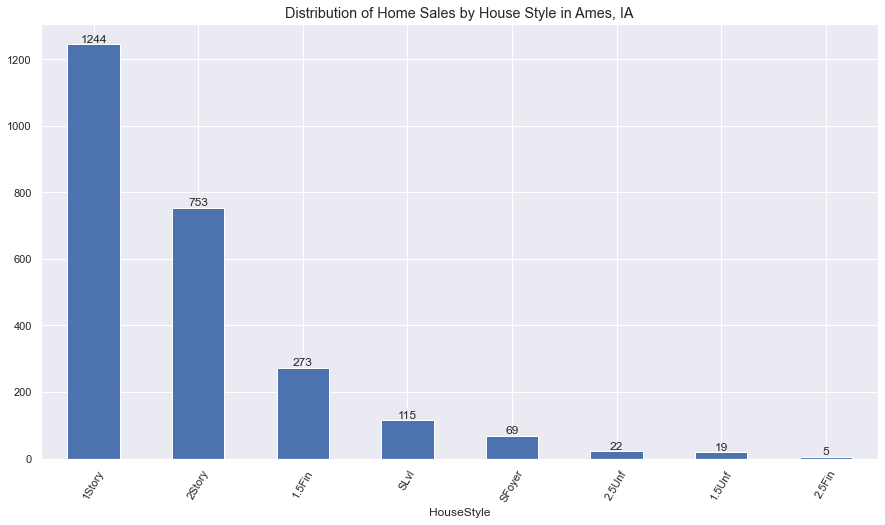

In [27]:
#what are the most common HouseStyles?

style_plt = ames.groupby('HouseStyle')['HouseStyle'].count().sort_values(
    ascending=False).tail(15).plot.bar(rot=60)
plt.title('Distribution of Home Sales by House Style in Ames, IA',size='large')
for container in style_plt.containers:
    style_plt.bar_label(container)
    
plt.show()


In [ ]:
#almost 50% of home sales are 1Story
pd.concat([ames.HouseStyle.value_counts(),
           ((ames.HouseStyle.value_counts()/len(ames))*100).rename("Percent")], axis=1)

In [ ]:
#what are the most common Building Types?

building_plt = ames.groupby('BldgType')['BldgType'].count().sort_values(
    ascending=False).tail(15).plot.bar(rot=60)
plt.title('Distribution of Home Sales by BldgType in Ames, IA',size='large')
for container in building_plt.containers:
    building_plt.bar_label(container)
    
plt.show()


In [ ]:
#over 80% of home sales are 1Fam
pd.concat([ames.BldgType.value_counts(),
           ((ames.BldgType.value_counts()/len(ames))*100).rename("Percent")], axis=1)


In [ ]:
#what are the most common Sale Types?

sales_plt = ames.groupby('SaleType')['SaleType'].count().sort_values(
    ascending=False).tail(15).plot.bar(rot=60)
plt.title('Distribution of Home Sales by Sale Type in Ames, IA',size='large')
for container in sales_plt.containers:
    sales_plt.bar_label(container)
    
plt.show()


In [ ]:
#over 90% of home sales are WD (Warranty Deed - Conventional)
pd.concat([ames.SaleType.value_counts(),
           ((ames.SaleType.value_counts()/len(ames))*100).rename("Percent")], axis=1)


In [ ]:
#what are the most common Fence Types?

fence_plt = ames.groupby('Fence')['Fence'].count().sort_values(
    ascending=False).tail(15).plot.bar(rot=60)
plt.title('Distribution of Home Sales by Fence Type in Ames, IA',size='large')
for container in fence_plt.containers:
    fence_plt.bar_label(container)
    
plt.show()


In [ ]:
#around 80% of home sales have NoFence
pd.concat([ames.Fence.value_counts(),
           ((ames.Fence.value_counts()/len(ames))*100).rename("Percent")], axis=1)
